###### In this tutorial we will see how, starting from row (toy) data, we can apply MOWGAN in the most easy way

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pandas as pd
import scanpy as sc
import anndata

%matplotlib inline

### Import MOWGAN

In [2]:
from mowgan.train import train

### Load your data

###### Data are in the anndata format (i.e., 'data.h5ad'). 
###### A minimum of two dataset is required.
###### MOWGAN needs data already processed (i.e., filtered, normalized, ...). They shall include in the ".obsm" compartment the matrix of the embedding we want to use (e.g., .obsm['X_pca']). Moreover, the weighted adjacency matrix of the neighborhood graph is also required (i.e., .obsp['connectivities']).

###### Here, we use two toy datasets and we compute the pca, umap and the neighborhood graph:

In [3]:
data1 = sc.datasets.blobs(n_variables=1100, n_centers=3, cluster_std=1.0, n_observations=7000)
data2 = sc.datasets.blobs(n_variables=2100, n_centers=3, cluster_std=.7, n_observations=8000)

In [4]:
sc.pp.pca(data1)
sc.pp.pca(data2)

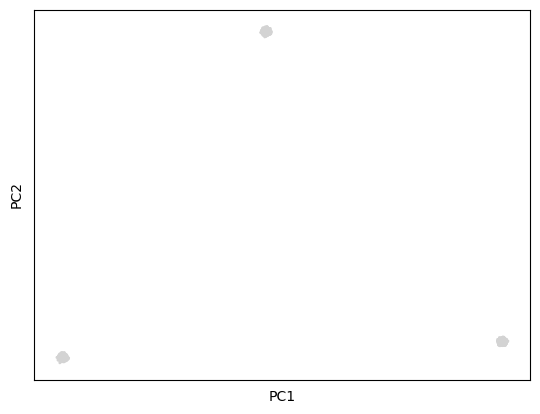

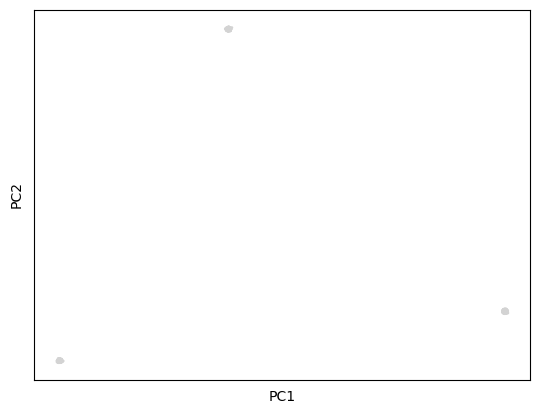

In [5]:
sc.pl.pca(data1)
sc.pl.pca(data2)

In [6]:
sc.pp.neighbors(data1)
sc.pp.neighbors(data2)

/Users/giansanti.valentina/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/numba/cpython/hashing.py:484: UserWarning: FNV hashing is not implemented in Numba. See PEP 456 https://www.python.org/dev/peps/pep-0456/ for rationale over not using FNV. Numba will continue to work, but hashes for built in types will be computed using siphash24. This will permit e.g. dictionaries to continue to behave as expected, however anything relying on the value of the hash opposed to hash as a derived property is likely to not work as expected.
  warnings.warn(msg)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
sc.tl.umap(data1)
sc.tl.umap(data2)

In [8]:
sc.tl.leiden(data1)
sc.tl.leiden(data2)

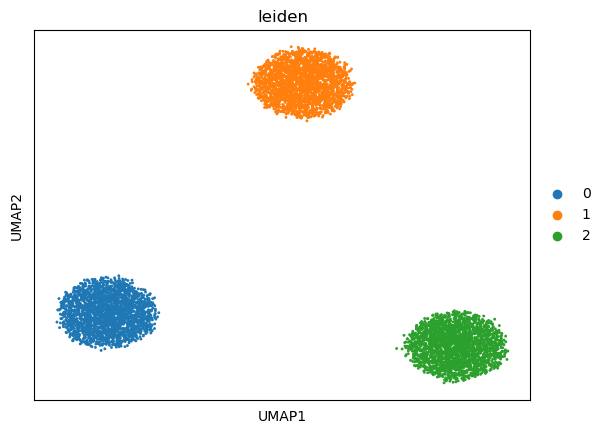

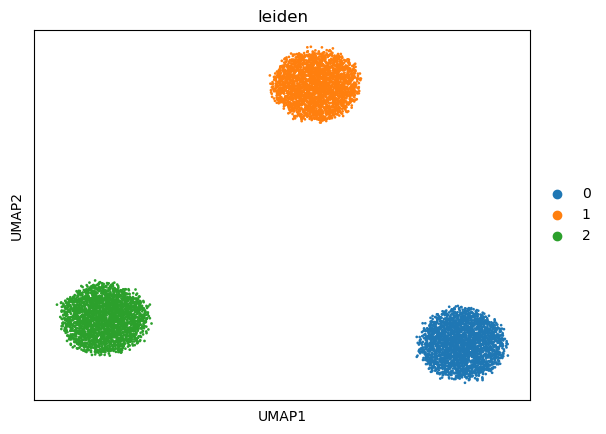

In [9]:
sc.pl.umap(data1, color='leiden')
sc.pl.umap(data2, color='leiden')

In [10]:
data1

AnnData object with n_obs × n_vars = 7000 × 1100
    obs: 'blobs', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [11]:
data2

AnnData object with n_obs × n_vars = 8000 × 2100
    obs: 'blobs', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

###### Now data1 and data2 have the required slots: *.obsm['X_pca'], *.obsm['X_umap'] and *.obsp['connectivities']
###### We can now train MOWGAN model. We use the function train.train().
###### Required parameters are:
    data --> list of anndata objects
    query --> list of embeddings to use in the training (they can be different)
    n_dim --> number of dimensions evaluated for the embeddings
    fill --> list of the filters characterizing the neural network
    n_epochs --> number of training epochs 
    save_name --> list of names for the generated objects 

In [12]:
train.train(data=[data1,data2], query=['X_pca','X_umap'],n_dim=2,
            fill=[128,128], n_epochs=300, save_name=['test1','test2'], path='my_directory/')

/Users/giansanti.valentina/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/giansanti.valentina/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
2024-01-09 14:36:42.590733: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-09 14:36:42.590917: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


  0%|                                                                                                                        | 0/234 [00:00<?, ?it/s]2024-01-09 14:36:43.091911: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2024-01-09 14:36:43.094247: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-09 14:36:43.094357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
  3%|██▉                                                                                                              | 1/39 [00:00<00:02, 15.29it/s]


Epoch: 0 | disc_loss1: 4.293644428253174 | gen_loss: -0.18041324615478516 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.74it/s]


Epoch: 1 | disc_loss1: 2.308506965637207 | gen_loss: -0.6349531412124634 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.44it/s]


Epoch: 2 | disc_loss1: 1.668434977531433 | gen_loss: -1.2664835453033447 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.32it/s]


Epoch: 3 | disc_loss1: 1.8423473834991455 | gen_loss: -1.974726915359497 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.32it/s]


Epoch: 4 | disc_loss1: 2.207760810852051 | gen_loss: -2.4858591556549072 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.28it/s]


Epoch: 5 | disc_loss1: 2.537203788757324 | gen_loss: -2.796053409576416 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.74it/s]


Epoch: 6 | disc_loss1: 2.755556583404541 | gen_loss: -2.9682815074920654 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.02it/s]


Epoch: 7 | disc_loss1: 2.9106085300445557 | gen_loss: -3.08840274810791 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.01it/s]


Epoch: 8 | disc_loss1: 3.2401981353759766 | gen_loss: -3.0848495960235596 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.87it/s]


Epoch: 9 | disc_loss1: 3.463874578475952 | gen_loss: -3.073862075805664 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.96it/s]


Epoch: 10 | disc_loss1: 3.520933151245117 | gen_loss: -3.0172297954559326 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.70it/s]


Epoch: 11 | disc_loss1: 3.4702091217041016 | gen_loss: -2.7841386795043945 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.57it/s]


Epoch: 12 | disc_loss1: 3.298485279083252 | gen_loss: -2.377638816833496 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.85it/s]


Epoch: 13 | disc_loss1: 2.7885336875915527 | gen_loss: -1.7514082193374634 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.80it/s]


Epoch: 14 | disc_loss1: 2.404797077178955 | gen_loss: -0.9829877018928528 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.72it/s]


Epoch: 15 | disc_loss1: 1.875532865524292 | gen_loss: -0.10565505176782608 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.93it/s]


Epoch: 16 | disc_loss1: 0.8920162916183472 | gen_loss: 0.6014212369918823 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.39it/s]


Epoch: 17 | disc_loss1: 0.361530065536499 | gen_loss: 1.7280497550964355 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.41it/s]


Epoch: 18 | disc_loss1: -0.16192984580993652 | gen_loss: 2.8566606044769287 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.92it/s]


Epoch: 19 | disc_loss1: -1.300039529800415 | gen_loss: 3.8887112140655518 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.98it/s]


Epoch: 20 | disc_loss1: -2.691049098968506 | gen_loss: 5.020091533660889 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.08it/s]


Epoch: 21 | disc_loss1: -4.128117084503174 | gen_loss: 5.939509391784668 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.76it/s]


Epoch: 22 | disc_loss1: -5.339944362640381 | gen_loss: 6.547110557556152 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.61it/s]


Epoch: 23 | disc_loss1: -5.730045795440674 | gen_loss: 6.522244453430176 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.97it/s]


Epoch: 24 | disc_loss1: -5.848675727844238 | gen_loss: 6.3782453536987305 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.37it/s]


Epoch: 25 | disc_loss1: -5.330875873565674 | gen_loss: 5.757925510406494 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.21it/s]


Epoch: 26 | disc_loss1: -4.569680690765381 | gen_loss: 5.05092716217041 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.51it/s]


Epoch: 27 | disc_loss1: -3.3418655395507812 | gen_loss: 3.966254234313965 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.63it/s]


Epoch: 28 | disc_loss1: -2.324608325958252 | gen_loss: 3.0168323516845703 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.65it/s]


Epoch: 29 | disc_loss1: -1.519301176071167 | gen_loss: 2.24893856048584 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 49.83it/s]


Epoch: 30 | disc_loss1: -1.117774486541748 | gen_loss: 1.7817221879959106 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.40it/s]


Epoch: 31 | disc_loss1: -0.709426999092102 | gen_loss: 1.313145399093628 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.87it/s]


Epoch: 32 | disc_loss1: -0.26940077543258667 | gen_loss: 0.8187427520751953 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.26it/s]


Epoch: 33 | disc_loss1: 0.15207669138908386 | gen_loss: 0.3809402585029602 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.31it/s]


Epoch: 34 | disc_loss1: 0.4719788134098053 | gen_loss: 0.0848117545247078 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.30it/s]


Epoch: 35 | disc_loss1: 0.6982814073562622 | gen_loss: -0.011888612993061543 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.58it/s]


Epoch: 36 | disc_loss1: 0.6888446807861328 | gen_loss: -0.016135191544890404 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.60it/s]


Epoch: 37 | disc_loss1: 0.6325119733810425 | gen_loss: -0.010970281437039375 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.62it/s]


Epoch: 38 | disc_loss1: 0.6106988191604614 | gen_loss: -0.005425304640084505 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.83it/s]


Epoch: 39 | disc_loss1: 0.6036615967750549 | gen_loss: -0.0002635402779560536 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.91it/s]


Epoch: 40 | disc_loss1: 0.6089969277381897 | gen_loss: 0.005459943320602179 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.19it/s]


Epoch: 41 | disc_loss1: 0.5389169454574585 | gen_loss: 0.01068922970443964 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.96it/s]


Epoch: 42 | disc_loss1: 0.5236055850982666 | gen_loss: 0.015473823063075542 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.64it/s]


Epoch: 43 | disc_loss1: 0.5346142053604126 | gen_loss: 0.020398210734128952 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.54it/s]


Epoch: 44 | disc_loss1: 0.5242012739181519 | gen_loss: 0.025827033445239067 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.05it/s]


Epoch: 45 | disc_loss1: 0.4999118745326996 | gen_loss: 0.03103461302816868 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.78it/s]


Epoch: 46 | disc_loss1: 0.5447408556938171 | gen_loss: 0.036028292030096054 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.69it/s]


Epoch: 47 | disc_loss1: 0.4775356650352478 | gen_loss: 0.04188177362084389 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 51.13it/s]


Epoch: 48 | disc_loss1: 0.47405529022216797 | gen_loss: 0.04722466319799423 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.93it/s]


Epoch: 49 | disc_loss1: 0.5086580514907837 | gen_loss: 0.052904803305864334 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.76it/s]


Epoch: 50 | disc_loss1: 0.5343536734580994 | gen_loss: 0.058020707219839096 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.78it/s]


Epoch: 51 | disc_loss1: 0.4859863519668579 | gen_loss: 0.06385336071252823 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.02it/s]


Epoch: 52 | disc_loss1: 0.5098613500595093 | gen_loss: 0.06982870399951935 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.85it/s]


Epoch: 53 | disc_loss1: 0.5014156103134155 | gen_loss: 0.07511815428733826 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.36it/s]


Epoch: 54 | disc_loss1: 0.6212973594665527 | gen_loss: 0.0805869773030281 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.14it/s]


Epoch: 55 | disc_loss1: 0.5266295075416565 | gen_loss: 0.08588714152574539 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.10it/s]


Epoch: 56 | disc_loss1: 0.5099226832389832 | gen_loss: 0.09135076403617859 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.40it/s]


Epoch: 57 | disc_loss1: 0.5112259984016418 | gen_loss: 0.09595190733671188 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.10it/s]


Epoch: 58 | disc_loss1: 0.5656687617301941 | gen_loss: 0.10153374820947647 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.36it/s]


Epoch: 59 | disc_loss1: 0.47870123386383057 | gen_loss: 0.10585388541221619 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.10it/s]


Epoch: 60 | disc_loss1: 0.4812238812446594 | gen_loss: 0.11236895620822906 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.46it/s]


Epoch: 61 | disc_loss1: 0.5149585604667664 | gen_loss: 0.11436089873313904 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.87it/s]


Epoch: 62 | disc_loss1: 0.49775558710098267 | gen_loss: 0.12014815211296082 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.57it/s]


Epoch: 63 | disc_loss1: 0.47870784997940063 | gen_loss: 0.12362316995859146 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.36it/s]


Epoch: 64 | disc_loss1: 0.5029387474060059 | gen_loss: 0.1299508810043335 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.03it/s]


Epoch: 65 | disc_loss1: 0.5891205072402954 | gen_loss: 0.13383157551288605 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.84it/s]


Epoch: 66 | disc_loss1: 0.46730679273605347 | gen_loss: 0.1395515352487564 


  3%|██▉                                                                                                              | 1/39 [00:00<00:01, 26.95it/s]


Epoch: 67 | disc_loss1: 0.43390512466430664 | gen_loss: 0.14602428674697876 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 51.93it/s]


Epoch: 68 | disc_loss1: 0.4520246684551239 | gen_loss: 0.14974498748779297 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.09it/s]


Epoch: 69 | disc_loss1: 0.4371017813682556 | gen_loss: 0.15551739931106567 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.08it/s]


Epoch: 70 | disc_loss1: 0.40836530923843384 | gen_loss: 0.16067259013652802 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.24it/s]


Epoch: 71 | disc_loss1: 0.3791036307811737 | gen_loss: 0.16476541757583618 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.33it/s]


Epoch: 72 | disc_loss1: 0.41859275102615356 | gen_loss: 0.16924484074115753 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.16it/s]


Epoch: 73 | disc_loss1: 0.3646959662437439 | gen_loss: 0.17430166900157928 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.04it/s]


Epoch: 74 | disc_loss1: 0.3557033836841583 | gen_loss: 0.18045149743556976 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.17it/s]


Epoch: 75 | disc_loss1: 0.30988073348999023 | gen_loss: 0.18624265491962433 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.14it/s]


Epoch: 76 | disc_loss1: 0.3093452751636505 | gen_loss: 0.1931001991033554 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.89it/s]


Epoch: 77 | disc_loss1: 0.22505155205726624 | gen_loss: 0.2005041092634201 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.15it/s]


Epoch: 78 | disc_loss1: 0.2534536123275757 | gen_loss: 0.20634625852108002 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.52it/s]


Epoch: 79 | disc_loss1: 0.19143664836883545 | gen_loss: 0.21277213096618652 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.96it/s]


Epoch: 80 | disc_loss1: 0.18411760032176971 | gen_loss: 0.2183222770690918 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.22it/s]


Epoch: 81 | disc_loss1: 0.12254323810338974 | gen_loss: 0.2226388156414032 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.31it/s]


Epoch: 82 | disc_loss1: 0.127599835395813 | gen_loss: 0.23271724581718445 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.38it/s]


Epoch: 83 | disc_loss1: 0.1179884746670723 | gen_loss: 0.23636317253112793 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.06it/s]


Epoch: 84 | disc_loss1: 0.13417471945285797 | gen_loss: 0.24336928129196167 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.98it/s]


Epoch: 85 | disc_loss1: 0.0524648055434227 | gen_loss: 0.24904043972492218 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 43.86it/s]


Epoch: 86 | disc_loss1: 0.036659836769104004 | gen_loss: 0.2525760531425476 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.75it/s]


Epoch: 87 | disc_loss1: 0.017682239413261414 | gen_loss: 0.2561260461807251 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.55it/s]


Epoch: 88 | disc_loss1: 0.023745551705360413 | gen_loss: 0.26080790162086487 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.46it/s]


Epoch: 89 | disc_loss1: 0.013287343084812164 | gen_loss: 0.2648228108882904 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.02it/s]


Epoch: 90 | disc_loss1: 0.009881153702735901 | gen_loss: 0.26961010694503784 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.30it/s]


Epoch: 91 | disc_loss1: -0.012731574475765228 | gen_loss: 0.27388614416122437 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.07it/s]


Epoch: 92 | disc_loss1: -0.05963747203350067 | gen_loss: 0.27732139825820923 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.69it/s]


Epoch: 93 | disc_loss1: -0.07466529309749603 | gen_loss: 0.2815370261669159 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.94it/s]


Epoch: 94 | disc_loss1: -0.07071834802627563 | gen_loss: 0.2867087423801422 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.72it/s]


Epoch: 95 | disc_loss1: -0.08476080000400543 | gen_loss: 0.2873125970363617 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.15it/s]


Epoch: 96 | disc_loss1: -0.07037732005119324 | gen_loss: 0.29254481196403503 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.21it/s]


Epoch: 97 | disc_loss1: -0.06550968438386917 | gen_loss: 0.29339250922203064 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.24it/s]


Epoch: 98 | disc_loss1: -0.06565608084201813 | gen_loss: 0.25987035036087036 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.95it/s]


Epoch: 99 | disc_loss1: 0.4675903618335724 | gen_loss: -0.07929602265357971 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.18it/s]


Epoch: 100 | disc_loss1: 0.7801718711853027 | gen_loss: -0.6793720126152039 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.51it/s]


Epoch: 101 | disc_loss1: 1.0163209438323975 | gen_loss: -1.071219801902771 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.82it/s]


Epoch: 102 | disc_loss1: 1.094455599784851 | gen_loss: -1.0652552843093872 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.15it/s]


Epoch: 103 | disc_loss1: 0.8571174144744873 | gen_loss: -0.8934398293495178 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.22it/s]


Epoch: 104 | disc_loss1: 0.23249122500419617 | gen_loss: -0.15152227878570557 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.26it/s]


Epoch: 105 | disc_loss1: -0.592167854309082 | gen_loss: 0.7343728542327881 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.29it/s]


Epoch: 106 | disc_loss1: -1.4212974309921265 | gen_loss: 1.6283841133117676 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.07it/s]


Epoch: 107 | disc_loss1: -1.5585929155349731 | gen_loss: 1.9433231353759766 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.91it/s]


Epoch: 108 | disc_loss1: -1.3646131753921509 | gen_loss: 1.7503107786178589 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.44it/s]


Epoch: 109 | disc_loss1: -0.8824864625930786 | gen_loss: 1.4220246076583862 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.33it/s]


Epoch: 110 | disc_loss1: -0.8818508982658386 | gen_loss: 1.4992356300354004 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.98it/s]


Epoch: 111 | disc_loss1: -1.1967397928237915 | gen_loss: 1.7558497190475464 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.56it/s]


Epoch: 112 | disc_loss1: -1.3967002630233765 | gen_loss: 1.9461016654968262 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.89it/s]


Epoch: 113 | disc_loss1: -1.2583235502243042 | gen_loss: 1.8709670305252075 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.83it/s]


Epoch: 114 | disc_loss1: -0.8166407942771912 | gen_loss: 1.463431715965271 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.53it/s]


Epoch: 115 | disc_loss1: -0.45070767402648926 | gen_loss: 1.0788382291793823 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.22it/s]


Epoch: 116 | disc_loss1: 0.15416677296161652 | gen_loss: 0.5980769395828247 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.31it/s]


Epoch: 117 | disc_loss1: 0.8584624528884888 | gen_loss: 0.2961375415325165 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.54it/s]


Epoch: 118 | disc_loss1: 0.6631301641464233 | gen_loss: 0.2580413818359375 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.52it/s]


Epoch: 119 | disc_loss1: 0.6588200926780701 | gen_loss: 0.264826238155365 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 51.98it/s]


Epoch: 120 | disc_loss1: 0.5974386930465698 | gen_loss: 0.27335625886917114 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.41it/s]


Epoch: 121 | disc_loss1: 0.5973448753356934 | gen_loss: 0.28348881006240845 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.79it/s]


Epoch: 122 | disc_loss1: 0.571013867855072 | gen_loss: 0.29049041867256165 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.87it/s]


Epoch: 123 | disc_loss1: 0.5566368103027344 | gen_loss: 0.29757067561149597 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.37it/s]


Epoch: 124 | disc_loss1: 0.5519042015075684 | gen_loss: 0.30525875091552734 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.73it/s]


Epoch: 125 | disc_loss1: 0.5118269920349121 | gen_loss: 0.3098836839199066 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.59it/s]


Epoch: 126 | disc_loss1: 0.4874211549758911 | gen_loss: 0.3203108608722687 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.77it/s]


Epoch: 127 | disc_loss1: 0.5068084001541138 | gen_loss: 0.3231799900531769 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.82it/s]


Epoch: 128 | disc_loss1: 0.46988174319267273 | gen_loss: 0.3322595953941345 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 48.25it/s]


Epoch: 129 | disc_loss1: 0.4286319613456726 | gen_loss: 0.33337119221687317 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.86it/s]


Epoch: 130 | disc_loss1: 0.43532034754753113 | gen_loss: 0.34479081630706787 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.26it/s]


Epoch: 131 | disc_loss1: 0.3737117648124695 | gen_loss: 0.34433621168136597 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.92it/s]


Epoch: 132 | disc_loss1: 0.39061474800109863 | gen_loss: 0.3550681471824646 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.10it/s]


Epoch: 133 | disc_loss1: 0.38634419441223145 | gen_loss: 0.3555159866809845 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.13it/s]


Epoch: 134 | disc_loss1: 0.3669934570789337 | gen_loss: 0.36742889881134033 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.19it/s]


Epoch: 135 | disc_loss1: 0.35410988330841064 | gen_loss: 0.36616262793540955 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.10it/s]


Epoch: 136 | disc_loss1: 0.3042297959327698 | gen_loss: 0.3775346875190735 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.33it/s]


Epoch: 137 | disc_loss1: 0.34627988934516907 | gen_loss: 0.37552133202552795 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.54it/s]


Epoch: 138 | disc_loss1: 0.3401768207550049 | gen_loss: 0.3912782073020935 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.39it/s]


Epoch: 139 | disc_loss1: 0.2982965111732483 | gen_loss: 0.38492995500564575 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.02it/s]


Epoch: 140 | disc_loss1: 0.31921446323394775 | gen_loss: 0.4001813232898712 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.39it/s]


Epoch: 141 | disc_loss1: 0.2834804058074951 | gen_loss: 0.39626243710517883 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.94it/s]


Epoch: 142 | disc_loss1: 0.30040499567985535 | gen_loss: 0.41129663586616516 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.85it/s]


Epoch: 143 | disc_loss1: 0.24191224575042725 | gen_loss: 0.4102519750595093 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.30it/s]


Epoch: 144 | disc_loss1: 0.24880489706993103 | gen_loss: 0.42244255542755127 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 51.46it/s]


Epoch: 145 | disc_loss1: 0.24819324910640717 | gen_loss: 0.4218539297580719 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.58it/s]


Epoch: 146 | disc_loss1: 0.2298363298177719 | gen_loss: 0.4339306950569153 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.73it/s]


Epoch: 147 | disc_loss1: 0.2192760407924652 | gen_loss: 0.4348302185535431 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.13it/s]


Epoch: 148 | disc_loss1: 0.1876862347126007 | gen_loss: 0.44544777274131775 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.07it/s]


Epoch: 149 | disc_loss1: 0.1994197964668274 | gen_loss: 0.4483630657196045 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.79it/s]


Epoch: 150 | disc_loss1: 0.15457762777805328 | gen_loss: 0.45453575253486633 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.92it/s]


Epoch: 151 | disc_loss1: 0.16389790177345276 | gen_loss: 0.4583585262298584 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.49it/s]


Epoch: 152 | disc_loss1: 0.1257210075855255 | gen_loss: 0.468372642993927 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.75it/s]


Epoch: 153 | disc_loss1: 0.1505827009677887 | gen_loss: 0.4672572612762451 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.91it/s]


Epoch: 154 | disc_loss1: 0.2015150785446167 | gen_loss: 0.48879846930503845 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.22it/s]


Epoch: 155 | disc_loss1: 0.17428812384605408 | gen_loss: 0.47557201981544495 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.57it/s]


Epoch: 156 | disc_loss1: 0.14073175191879272 | gen_loss: 0.4969451129436493 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.31it/s]


Epoch: 157 | disc_loss1: 0.09713747352361679 | gen_loss: 0.49255481362342834 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.64it/s]


Epoch: 158 | disc_loss1: 0.11526568233966827 | gen_loss: 0.5060567855834961 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.27it/s]


Epoch: 159 | disc_loss1: 0.10933274030685425 | gen_loss: 0.5033994317054749 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.04it/s]


Epoch: 160 | disc_loss1: 0.07886869460344315 | gen_loss: 0.5167100429534912 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.83it/s]


Epoch: 161 | disc_loss1: 0.04789920151233673 | gen_loss: 0.5163453221321106 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.03it/s]


Epoch: 162 | disc_loss1: 0.05848971754312515 | gen_loss: 0.5253452658653259 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.09it/s]


Epoch: 163 | disc_loss1: 0.022748149931430817 | gen_loss: 0.5272747874259949 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.18it/s]


Epoch: 164 | disc_loss1: 0.04431501775979996 | gen_loss: 0.5210459232330322 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.96it/s]


Epoch: 165 | disc_loss1: 0.13658024370670319 | gen_loss: 0.4506635069847107 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.31it/s]


Epoch: 166 | disc_loss1: 0.5767080187797546 | gen_loss: 0.32988792657852173 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.20it/s]


Epoch: 167 | disc_loss1: 0.2283073365688324 | gen_loss: 0.39586561918258667 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.84it/s]


Epoch: 168 | disc_loss1: 0.2484740912914276 | gen_loss: 0.3580165207386017 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.98it/s]


Epoch: 169 | disc_loss1: 0.20047830045223236 | gen_loss: 0.41046440601348877 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.87it/s]


Epoch: 170 | disc_loss1: 0.22473369538784027 | gen_loss: 0.3531726002693176 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.94it/s]


Epoch: 171 | disc_loss1: 0.24119512736797333 | gen_loss: 0.36637893319129944 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.20it/s]


Epoch: 172 | disc_loss1: 0.2753105163574219 | gen_loss: 0.35140877962112427 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.85it/s]


Epoch: 173 | disc_loss1: 0.2641196548938751 | gen_loss: 0.35106584429740906 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.36it/s]


Epoch: 174 | disc_loss1: 0.32506677508354187 | gen_loss: 0.3425765633583069 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.24it/s]


Epoch: 175 | disc_loss1: 0.2713424563407898 | gen_loss: 0.3504526615142822 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.70it/s]


Epoch: 176 | disc_loss1: 0.29760557413101196 | gen_loss: 0.3436931073665619 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.01it/s]


Epoch: 177 | disc_loss1: 0.2377944439649582 | gen_loss: 0.3575144112110138 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.87it/s]


Epoch: 178 | disc_loss1: 0.23435455560684204 | gen_loss: 0.3502301871776581 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.24it/s]


Epoch: 179 | disc_loss1: 0.21795757114887238 | gen_loss: 0.3603707253932953 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.81it/s]


Epoch: 180 | disc_loss1: 0.24424943327903748 | gen_loss: 0.3541630804538727 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.48it/s]


Epoch: 181 | disc_loss1: 0.2058613896369934 | gen_loss: 0.3632577061653137 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.80it/s]


Epoch: 182 | disc_loss1: 0.24619075655937195 | gen_loss: 0.35192808508872986 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.44it/s]


Epoch: 183 | disc_loss1: 0.2225589156150818 | gen_loss: 0.3646683096885681 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.16it/s]


Epoch: 184 | disc_loss1: 0.2099500298500061 | gen_loss: 0.3643215298652649 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.28it/s]


Epoch: 185 | disc_loss1: 0.16951081156730652 | gen_loss: 0.38128337264060974 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.94it/s]


Epoch: 186 | disc_loss1: 0.15769213438034058 | gen_loss: 0.38352203369140625 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.97it/s]


Epoch: 187 | disc_loss1: 0.17857392132282257 | gen_loss: 0.39102470874786377 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.05it/s]


Epoch: 188 | disc_loss1: 0.17858389019966125 | gen_loss: 0.39138391613960266 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.90it/s]


Epoch: 189 | disc_loss1: 0.15922686457633972 | gen_loss: 0.40566208958625793 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 47.50it/s]


Epoch: 190 | disc_loss1: 0.12448278069496155 | gen_loss: 0.40367230772972107 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.45it/s]


Epoch: 191 | disc_loss1: 0.1078849509358406 | gen_loss: 0.41980278491973877 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.34it/s]


Epoch: 192 | disc_loss1: 0.09833915531635284 | gen_loss: 0.4189007878303528 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.38it/s]


Epoch: 193 | disc_loss1: 0.10161808133125305 | gen_loss: 0.42401906847953796 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.97it/s]


Epoch: 194 | disc_loss1: 0.09857086837291718 | gen_loss: 0.424259752035141 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.03it/s]


Epoch: 195 | disc_loss1: 0.08228842914104462 | gen_loss: 0.44068557024002075 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.54it/s]


Epoch: 196 | disc_loss1: 0.06972028315067291 | gen_loss: 0.44132235646247864 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.02it/s]


Epoch: 197 | disc_loss1: 0.04442492499947548 | gen_loss: 0.459136962890625 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.76it/s]


Epoch: 198 | disc_loss1: 0.02444256842136383 | gen_loss: 0.45849570631980896 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 51.63it/s]


Epoch: 199 | disc_loss1: -0.0056478604674339294 | gen_loss: 0.4804326295852661 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.05it/s]


Epoch: 200 | disc_loss1: -0.008453145623207092 | gen_loss: 0.48127827048301697 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.59it/s]


Epoch: 201 | disc_loss1: -0.022096794098615646 | gen_loss: 0.48185932636260986 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.78it/s]


Epoch: 202 | disc_loss1: -0.0045136958360672 | gen_loss: 0.49689605832099915 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.19it/s]


Epoch: 203 | disc_loss1: -0.06865562498569489 | gen_loss: 0.4916885495185852 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.28it/s]


Epoch: 204 | disc_loss1: -0.06670206040143967 | gen_loss: 0.5143876075744629 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.29it/s]


Epoch: 205 | disc_loss1: -0.049739547073841095 | gen_loss: 0.4982915222644806 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.02it/s]


Epoch: 206 | disc_loss1: -0.07109517604112625 | gen_loss: 0.5298547148704529 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.67it/s]


Epoch: 207 | disc_loss1: -0.07506034523248672 | gen_loss: 0.49067947268486023 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.97it/s]


Epoch: 208 | disc_loss1: -0.10630488395690918 | gen_loss: 0.5137794613838196 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.08it/s]


Epoch: 209 | disc_loss1: -0.12973684072494507 | gen_loss: 0.5173566341400146 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.71it/s]


Epoch: 210 | disc_loss1: -0.12725168466567993 | gen_loss: 0.522578239440918 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.38it/s]


Epoch: 211 | disc_loss1: -0.184515118598938 | gen_loss: 0.5299769639968872 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.96it/s]


Epoch: 212 | disc_loss1: -0.17516496777534485 | gen_loss: 0.5326410531997681 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.01it/s]


Epoch: 213 | disc_loss1: -0.23906928300857544 | gen_loss: 0.5491478443145752 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.09it/s]


Epoch: 214 | disc_loss1: -0.15693111717700958 | gen_loss: 0.5368377566337585 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.18it/s]


Epoch: 215 | disc_loss1: -0.2534269392490387 | gen_loss: 0.5635275840759277 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.82it/s]


Epoch: 216 | disc_loss1: -0.22551321983337402 | gen_loss: 0.5453380942344666 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.98it/s]


Epoch: 217 | disc_loss1: -0.26673462986946106 | gen_loss: 0.5652855038642883 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.19it/s]


Epoch: 218 | disc_loss1: -0.26077234745025635 | gen_loss: 0.5702897310256958 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.46it/s]


Epoch: 219 | disc_loss1: -0.2758878171443939 | gen_loss: 0.5717256665229797 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.72it/s]


Epoch: 220 | disc_loss1: -0.22206178307533264 | gen_loss: 0.5578784346580505 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.34it/s]


Epoch: 221 | disc_loss1: -0.22360633313655853 | gen_loss: 0.5678578615188599 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.31it/s]


Epoch: 222 | disc_loss1: -0.20621611177921295 | gen_loss: 0.5703091025352478 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.22it/s]


Epoch: 223 | disc_loss1: -0.30880796909332275 | gen_loss: 0.576732337474823 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.09it/s]


Epoch: 224 | disc_loss1: -0.27493008971214294 | gen_loss: 0.5443692207336426 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.54it/s]


Epoch: 225 | disc_loss1: -0.3106980323791504 | gen_loss: 0.6123132109642029 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.82it/s]


Epoch: 226 | disc_loss1: -0.3264862298965454 | gen_loss: 0.5972381234169006 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.58it/s]


Epoch: 227 | disc_loss1: -0.29515594244003296 | gen_loss: 0.5797199606895447 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.10it/s]


Epoch: 228 | disc_loss1: -0.2949505150318146 | gen_loss: 0.5799864530563354 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.09it/s]


Epoch: 229 | disc_loss1: -0.3194185197353363 | gen_loss: 0.5947825908660889 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.84it/s]


Epoch: 230 | disc_loss1: -0.30375832319259644 | gen_loss: 0.6038075685501099 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.84it/s]


Epoch: 231 | disc_loss1: -0.32271426916122437 | gen_loss: 0.6126677393913269 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 51.80it/s]


Epoch: 232 | disc_loss1: -0.3154565095901489 | gen_loss: 0.5786623358726501 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.60it/s]


Epoch: 233 | disc_loss1: -0.22557653486728668 | gen_loss: 0.5715998411178589 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.82it/s]


Epoch: 234 | disc_loss1: -0.34615856409072876 | gen_loss: 0.6017593741416931 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.01it/s]


Epoch: 235 | disc_loss1: -0.31981411576271057 | gen_loss: 0.5784996747970581 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.03it/s]


Epoch: 236 | disc_loss1: -0.34212714433670044 | gen_loss: 0.5870385766029358 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.46it/s]


Epoch: 237 | disc_loss1: -0.36081209778785706 | gen_loss: 0.5923711657524109 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.73it/s]


Epoch: 238 | disc_loss1: -0.35128700733184814 | gen_loss: 0.5856537222862244 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.76it/s]


Epoch: 239 | disc_loss1: -0.33408617973327637 | gen_loss: 0.5839508771896362 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.35it/s]


Epoch: 240 | disc_loss1: -0.3882621228694916 | gen_loss: 0.6002829670906067 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.14it/s]


Epoch: 241 | disc_loss1: -0.3006953299045563 | gen_loss: 0.6031230688095093 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.01it/s]


Epoch: 242 | disc_loss1: -0.3916081488132477 | gen_loss: 0.6060375571250916 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.07it/s]


Epoch: 243 | disc_loss1: -0.369943767786026 | gen_loss: 0.59885573387146 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.94it/s]


Epoch: 244 | disc_loss1: -0.3184855282306671 | gen_loss: 0.6069238781929016 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 51.35it/s]


Epoch: 245 | disc_loss1: -0.2500600218772888 | gen_loss: 0.5963908433914185 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.67it/s]


Epoch: 246 | disc_loss1: -0.28882843255996704 | gen_loss: 0.6284780502319336 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.67it/s]


Epoch: 247 | disc_loss1: -0.32465654611587524 | gen_loss: 0.6344280242919922 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.62it/s]


Epoch: 248 | disc_loss1: -0.3677225410938263 | gen_loss: 0.6357988119125366 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.49it/s]


Epoch: 249 | disc_loss1: -0.37557825446128845 | gen_loss: 0.6308025121688843 


  3%|██▉                                                                                                              | 1/39 [00:00<00:02, 15.81it/s]


Epoch: 250 | disc_loss1: -0.36429864168167114 | gen_loss: 0.6219068765640259 


  3%|██▉                                                                                                              | 1/39 [00:00<00:01, 31.94it/s]


Epoch: 251 | disc_loss1: -0.3611370325088501 | gen_loss: 0.6146454215049744 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 49.02it/s]


Epoch: 252 | disc_loss1: -0.3580676317214966 | gen_loss: 0.6224995255470276 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 51.79it/s]


Epoch: 253 | disc_loss1: -0.3643496334552765 | gen_loss: 0.635284423828125 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.36it/s]


Epoch: 254 | disc_loss1: -0.3357660174369812 | gen_loss: 0.6481605768203735 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.25it/s]


Epoch: 255 | disc_loss1: -0.32048115134239197 | gen_loss: 0.6572614312171936 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.23it/s]


Epoch: 256 | disc_loss1: -0.2769721746444702 | gen_loss: 0.66783207654953 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.05it/s]


Epoch: 257 | disc_loss1: -0.408582866191864 | gen_loss: 0.6784861087799072 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.74it/s]


Epoch: 258 | disc_loss1: -0.389347642660141 | gen_loss: 0.682963490486145 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 52.41it/s]


Epoch: 259 | disc_loss1: -0.428507536649704 | gen_loss: 0.6903059482574463 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.02it/s]


Epoch: 260 | disc_loss1: -0.4802194833755493 | gen_loss: 0.6938106417655945 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.64it/s]


Epoch: 261 | disc_loss1: -0.4269227683544159 | gen_loss: 0.7004570960998535 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.17it/s]


Epoch: 262 | disc_loss1: -0.44270390272140503 | gen_loss: 0.7032104134559631 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.79it/s]


Epoch: 263 | disc_loss1: -0.4911341667175293 | gen_loss: 0.7082546949386597 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.14it/s]


Epoch: 264 | disc_loss1: -0.42587506771087646 | gen_loss: 0.7083144187927246 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.33it/s]


Epoch: 265 | disc_loss1: -0.3663451075553894 | gen_loss: 0.7160708904266357 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.70it/s]


Epoch: 266 | disc_loss1: -0.3595069646835327 | gen_loss: 0.7170747518539429 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.48it/s]


Epoch: 267 | disc_loss1: -0.4340016543865204 | gen_loss: 0.7195536494255066 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.27it/s]


Epoch: 268 | disc_loss1: -0.440788209438324 | gen_loss: 0.674987256526947 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.19it/s]


Epoch: 269 | disc_loss1: -0.28045201301574707 | gen_loss: 0.49215641617774963 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.99it/s]


Epoch: 270 | disc_loss1: -0.08273729681968689 | gen_loss: 0.49373841285705566 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.47it/s]


Epoch: 271 | disc_loss1: -0.39496397972106934 | gen_loss: 0.6206180453300476 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.54it/s]


Epoch: 272 | disc_loss1: -0.42099761962890625 | gen_loss: 0.6571487188339233 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.09it/s]


Epoch: 273 | disc_loss1: -0.3945772349834442 | gen_loss: 0.5979668498039246 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.77it/s]


Epoch: 274 | disc_loss1: -0.39476877450942993 | gen_loss: 0.6021531820297241 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.08it/s]


Epoch: 275 | disc_loss1: -0.3594616949558258 | gen_loss: 0.6180302500724792 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 49.85it/s]


Epoch: 276 | disc_loss1: -0.3673662841320038 | gen_loss: 0.6183711290359497 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.78it/s]


Epoch: 277 | disc_loss1: -0.39134979248046875 | gen_loss: 0.6188147068023682 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.30it/s]


Epoch: 278 | disc_loss1: -0.41098108887672424 | gen_loss: 0.6272430419921875 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.21it/s]


Epoch: 279 | disc_loss1: -0.4153006970882416 | gen_loss: 0.6362343430519104 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.86it/s]


Epoch: 280 | disc_loss1: -0.3997890055179596 | gen_loss: 0.642062783241272 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.20it/s]


Epoch: 281 | disc_loss1: -0.38717561960220337 | gen_loss: 0.6442590951919556 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.26it/s]


Epoch: 282 | disc_loss1: -0.3678002655506134 | gen_loss: 0.6502687335014343 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.42it/s]


Epoch: 283 | disc_loss1: -0.39779120683670044 | gen_loss: 0.6534842252731323 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.68it/s]


Epoch: 284 | disc_loss1: -0.41372939944267273 | gen_loss: 0.6593740582466125 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.09it/s]


Epoch: 285 | disc_loss1: -0.34218108654022217 | gen_loss: 0.6622262001037598 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.83it/s]


Epoch: 286 | disc_loss1: -0.23423698544502258 | gen_loss: 0.6764970421791077 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.00it/s]


Epoch: 287 | disc_loss1: -0.2825204133987427 | gen_loss: 0.6794217824935913 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.11it/s]


Epoch: 288 | disc_loss1: -0.3474196195602417 | gen_loss: 0.6907476782798767 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.69it/s]


Epoch: 289 | disc_loss1: -0.3472597599029541 | gen_loss: 0.6897661089897156 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.06it/s]


Epoch: 290 | disc_loss1: -0.3742222487926483 | gen_loss: 0.6913124322891235 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.60it/s]


Epoch: 291 | disc_loss1: -0.41883331537246704 | gen_loss: 0.6886013150215149 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.77it/s]


Epoch: 292 | disc_loss1: -0.43120908737182617 | gen_loss: 0.6895150542259216 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.12it/s]


Epoch: 293 | disc_loss1: -0.4323141276836395 | gen_loss: 0.6805869936943054 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.67it/s]


Epoch: 294 | disc_loss1: -0.40933653712272644 | gen_loss: 0.6823667287826538 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.46it/s]


Epoch: 295 | disc_loss1: -0.4430454671382904 | gen_loss: 0.685544490814209 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.88it/s]


Epoch: 296 | disc_loss1: -0.41750791668891907 | gen_loss: 0.6934895515441895 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 54.04it/s]


Epoch: 297 | disc_loss1: -0.42014336585998535 | gen_loss: 0.6968023180961609 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.83it/s]


Epoch: 298 | disc_loss1: -0.4000037908554077 | gen_loss: 0.6984694004058838 


  3%|██▉                                                                                                              | 1/39 [00:00<00:00, 53.82it/s]


Epoch: 299 | disc_loss1: -0.37613970041275024 | gen_loss: 0.692351222038269 


### Import results

###### When the training is completed, some files are saved:
    * model weights ('MOWGAN_model')
    * the critic loss ('critic_loss.csv')
    * the generator loss ('gen_loss.csv')
    * new adata objects, with default names 'anndata_1.h5ad', 'anndata_2.h5ad', etc.

In [13]:
path='my_directory/'

<AxesSubplot:title={'center':'Generator loss'}>

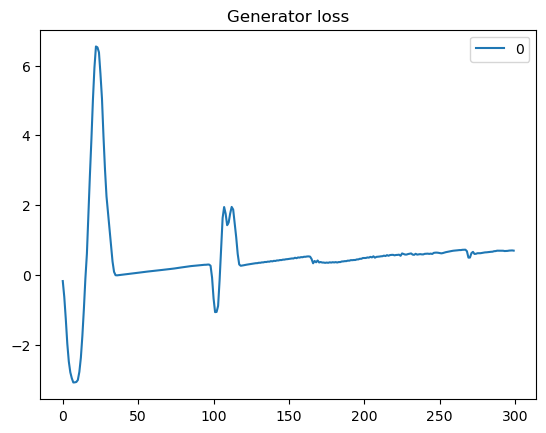

In [14]:
pd.read_csv(path+'gen_loss.csv', header=None).plot(title='Generator loss')

<AxesSubplot:title={'center':'Critic loss'}>

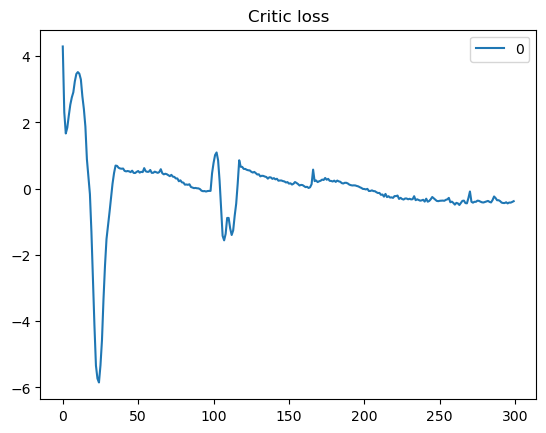

In [15]:
pd.read_csv(path+'critic_loss.csv', header=None).plot(title='Critic loss')

###### We can load MOWGAN's generated data. By default, 5000 cells are generated for each dataset. The number of variables is instead equal to the number of variables for modality in the original data. The new objects contains also the embeddings learned by MOWGAN.

In [17]:
data1_MOWGAN = sc.read(path+'test1.h5ad')
data2_MOWGAN = sc.read(path+'test2.h5ad')

In [18]:
data1_MOWGAN

AnnData object with n_obs × n_vars = 5000 × 1100
    obsm: 'X_pca'

In [19]:
data2_MOWGAN

AnnData object with n_obs × n_vars = 5000 × 2100
    obsm: 'X_umap'